<a href="https://colab.research.google.com/github/2303A510j7/ADM/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
file_path = '/content/customer_purchases.csv'  # Ensure this is the correct file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Dataset preview:")
print(df.head())


Dataset preview:
   Customer_ID  Age  Gender  Annual_Income  Spending_Score  Purchase_Frequency
0            1   58    Male      117383.70              11                   5
1            2   25    Male       94947.76              61                   9
2            3   19  Female      112576.38               3                   2
3            4   65    Male       43673.73              96                   2
4            5   35    Male       36250.18              70                  18


In [3]:
# 2. Generate basic summary statistics
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Customer_ID         Age  Annual_Income  Spending_Score  \
count   200.000000  200.000000     200.000000      200.000000   
mean    100.500000   43.770000   74288.223950       53.350000   
std      57.879185   15.259138   27753.561748       28.851509   
min       1.000000   18.000000   21953.200000        2.000000   
25%      50.750000   31.000000   52101.140000       30.750000   
50%     100.500000   43.000000   73617.210000       54.500000   
75%     150.250000   58.000000   99483.712500       78.000000   
max     200.000000   70.000000  118423.580000      100.000000   

       Purchase_Frequency  
count          200.000000  
mean            10.765000  
std              5.914786  
min              1.000000  
25%              5.000000  
50%             10.000000  
75%             16.000000  
max             20.000000  


In [4]:
# 3. Perform EDA using Pandas Profiling (Optional)
# You can generate a detailed report using Pandas Profiling if you have it installed.
# profile = ProfileReport(df, title="Customer Purchases EDA", explorative=True)
# profile.to_file("customer_purchases_eda_report.html")  # Save the report as an HTML file
# Uncomment above lines to generate and save the report

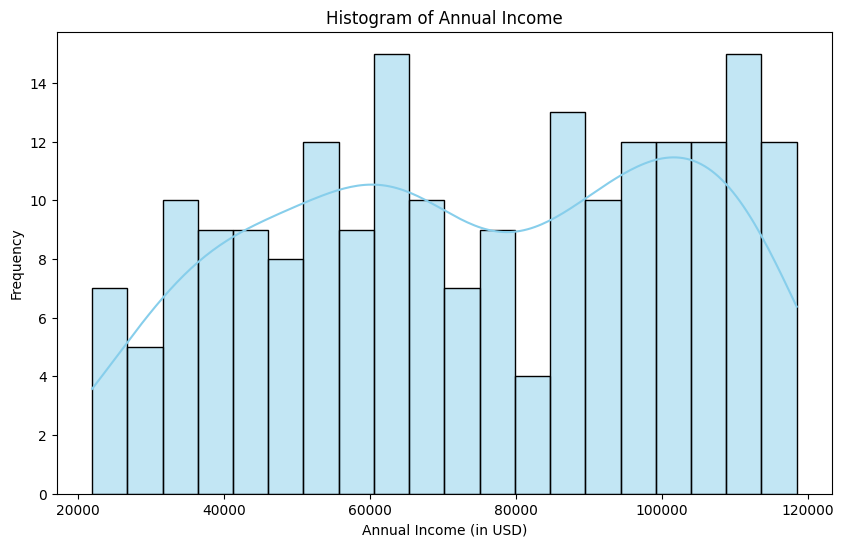

In [5]:

# 4.1 Histogram of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income (in USD)')
plt.ylabel('Frequency')
plt.show()

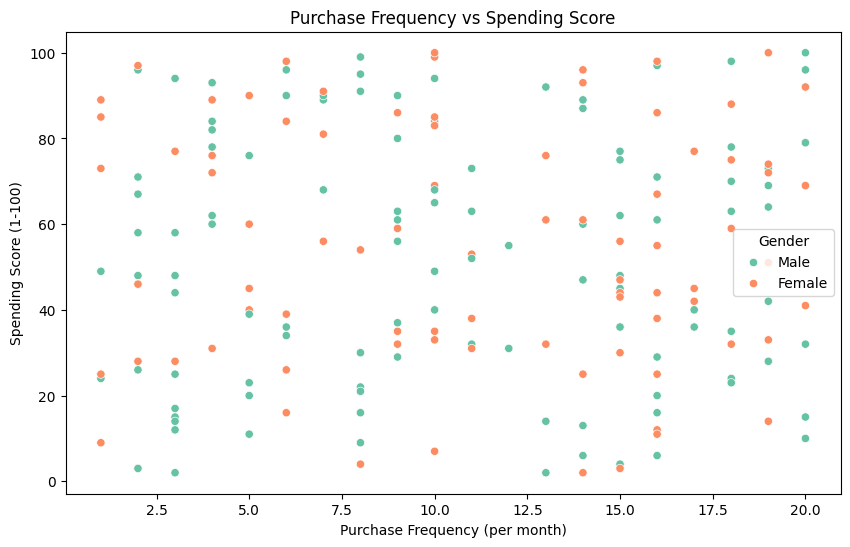

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Purchase_Frequency', y='Spending_Score', hue='Gender', palette='Set2')
plt.title('Purchase Frequency vs Spending Score')
plt.xlabel('Purchase Frequency (per month)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

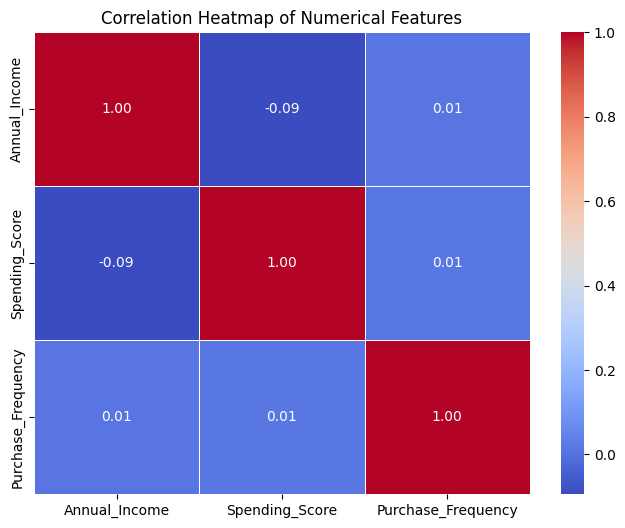

In [8]:
# 4.3 Correlation Heatmap: Numerical features (Income, Spending Score, Purchase Frequency)
corr_matrix = df[['Annual_Income', 'Spending_Score', 'Purchase_Frequency']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [9]:
# 5.1 Analyze Correlations between variables
correlation_income_spending = df['Annual_Income'].corr(df['Spending_Score'])
correlation_income_frequency = df['Annual_Income'].corr(df['Purchase_Frequency'])
correlation_spending_frequency = df['Spending_Score'].corr(df['Purchase_Frequency'])

print("\nCorrelation Analysis:")
print(f"Correlation between Income and Spending Score: {correlation_income_spending:.2f}")
print(f"Correlation between Income and Purchase Frequency: {correlation_income_frequency:.2f}")
print(f"Correlation between Spending Score and Purchase Frequency: {correlation_spending_frequency:.2f}")


Correlation Analysis:
Correlation between Income and Spending Score: -0.09
Correlation between Income and Purchase Frequency: 0.01
Correlation between Spending Score and Purchase Frequency: 0.01


In [10]:
# 5.2 Detect Outliers in Spending Score and Annual Income
# Using IQR (Interquartile Range) method to detect outliers
Q1_income = df['Annual_Income'].quantile(0.25)
Q3_income = df['Annual_Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

Q1_spending = df['Spending_Score'].quantile(0.25)
Q3_spending = df['Spending_Score'].quantile(0.75)
IQR_spending = Q3_spending - Q1_spending
lower_bound_spending = Q1_spending - 1.5 * IQR_spending
upper_bound_spending = Q3_spending + 1.5 * IQR_spending

# Find outliers
outliers_income = df[(df['Annual_Income'] < lower_bound_income) | (df['Annual_Income'] > upper_bound_income)]
outliers_spending = df[(df['Spending_Score'] < lower_bound_spending) | (df['Spending_Score'] > upper_bound_spending)]

print("\nOutliers Detection:")
print(f"Number of outliers in Annual Income: {len(outliers_income)}")
print(f"Number of outliers in Spending Score: {len(outliers_spending)}")

# Optionally, display the outliers for further inspection
print("\nOutliers in Annual Income:")
print(outliers_income[['Customer_ID', 'Annual_Income']])

print("\nOutliers in Spending Score:")
print(outliers_spending[['Customer_ID', 'Spending_Score']])


Outliers Detection:
Number of outliers in Annual Income: 0
Number of outliers in Spending Score: 0

Outliers in Annual Income:
Empty DataFrame
Columns: [Customer_ID, Annual_Income]
Index: []

Outliers in Spending Score:
Empty DataFrame
Columns: [Customer_ID, Spending_Score]
Index: []
